# Delaware State Employee Purchase Card Trends

## Societal Problem

Purchase Cards, commonly referred to as P-Cards, are credit cards offered by banking companies specifically for larger corporations and governments. These cards is registered under the name of whichever employee holds the card, but is completely backed by the Government's or Corporation's money. In the case of government organizations, P-Cards give employees a quick and adaptable way to get goods and equipment necessary to do their jobs. However, just like any expedited process, the increase of accessibility also comes with a decrease in security and oversight. In the case of the Delaware State Government this means giving state employees the ability to spend taxpayer money without prior approval.

## Background

The Delaware State Government has partnered with JP Morgan Chase in order to provide Purchase Cards to its departments. These cards are distributed to department employees as each department sees fit. While the names on the cards are that of the employees who hold them, the cards themselves are backed by the State's money. In order to ensure the proper use of the P-Cards Delaware often partners with independent contractors to perform audits of the departments' use of P-Card funds. For the majority of departments that are fully state controlled the audit system works well, but in more unique cases where P-Cards are used by institutions only partially controlled by the State, the audits can become causes of turmoil. One notable example of this would be the University of Delaware, which uses the P-Card system not complying with an audit request from the State. 

## Research Questions
* Are there seasonal and yearly fluctuations or trends in P-Card spending?  
    * Typical consumer spending is affected by Seasonality, or the idea that different season impact consumer spending habits [Kenton](https://www.investopedia.com/terms/s/seasonality.asp). I aim to see if P-Card spending mimics average consumer spending or not. In regards to yearly fluctuations, I intend to investigate specifically if P-Card funding was affect by COVID-19.
* What categories do P-Card purchases fall under? What are the general trends of purchases and did COVID-19 have an impact on what was purchased?
    * The categories of purchases can provided insight into how specifically P-Cards are being used. The two main uses described for P-Cards by the Delaware Financial Department are for office supplies and materials as well as travel. I would expect both of these groups to be heavily represented in the purchase breakdown. I also suspect however that the 2020 purchase will not reflect travel expenses to any significant extent because of the COVID-19 travel restrictions.
* How much money is typically spent per purchase? Do different departments have different means or trends? Is it consistent throughout?  Did COVID-19 also affect which department are making the most purchases?
    * Who is spending the P-Card money is one of the most important factors in investigating this subject matter. It is virtually impossible to create a blanket set of rules for all departments to follow, due to the distinct nature of each one's responsibilities and needs. Because of this some departments are bound to spend more than others and I intend to identify which departments are spending the most.

## Research Justification

The essence of this research's justification is the simple fact that the public deserves transparency in how their tax money is being spent by the government. While P-Card spending is often seen as insignificant and is not discussed in political reelection campaigns or congressional budget proposals, P-Card spending still averages close to 70 million dollars a year. Secondarily this money is also mostly spent by unelected officials. People who are not specifically trusted to their positions by the tax payers whose money they use, but rather by government bureaucracies. This even furthers the need for strict oversight and transparency to the tax payers.

## Ethical Considerations

The ethical considerations of P-Card spending center around 3 stakeholder group, those being the government agencies, tax payers, and the merchants that ultimate receive the money from P-Cards. The dynamic and necessity for transparency between the government agencies and tax payers is elaborated upon above, another relationship that should be considered is that between the government agencies and the merchants they choose to support. In most cases of P-Card spending, the choice of which merchant to support comes down to the single employee responsible for their government issued P-Card. This leaves the ethical decision of what merchant should be supported with government money down to a single individual. My goal of this analysis is to provide a clear and concise picture of P-Card spending for a public audience, but it is also important to keep in mind the other stakeholder relationships at play here as well.

## General Data Overview

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.colors as mcolors
import seaborn as sns
df = pd.read_csv("State_Employee_Credit_Card_Transactions.csv");

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040394 entries, 0 to 1040393
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   FISCAL_YEAR      1040394 non-null  int64  
 1   FISCAL_PERIOD    1040394 non-null  int64  
 2   DEPT_NAME        1040394 non-null  object 
 3   DIV_NAME         1040394 non-null  object 
 4   MERCHANT         1040394 non-null  object 
 5   CAT_DESCR        1040394 non-null  object 
 6   TRANS_DT         1040394 non-null  object 
 7   MERCHANDISE_AMT  1040394 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 63.5+ MB


In [3]:
df["FISCAL_YEAR"].unique()

array([2016, 2017, 2018, 2019, 2020, 2021])

In [4]:
len(df["DEPT_NAME"].unique())

73

In [5]:
df["MERCHANDISE_AMT"].sum()/6

69106406.04166667

The data set I chose to work with is an extensive list of P-Card purchases made over a 6 year period from 2016 to 2021. The set is collected by the Delaware Department of Finance and is available for public access [here](https://data.delaware.gov/Government-and-Finance/State-Employee-Credit-Card-Transactions/nurt-5rqw). Each row of the data set mimics a receipt of a purchase, providing information on the Department and division that made the purchase, the name of the merchant, a description of the what was bought, as well as the date and amount spent on the purchase. In total the data encompasses 73 unique department and their P-Card purchases which amount to \$414,638,466 over a span of 6 years.

## Time Analysis of Purchases

The intent of this section is to answer the first research question proposed: __Are there seasonal and yearly  fluctuations or trends in P-Card spending?__. In order to dissect this question I have broken down the data set into several visualizations that will help to show how P-Card spending has evolved over time.

### Monthly Analysis

The first of two time based analysis will focus on monthly periods of purchase. The intent of this section is to answer the first half of the above stated time related research questions. Any seasonal fluctuations should present themselves in the following analysis.

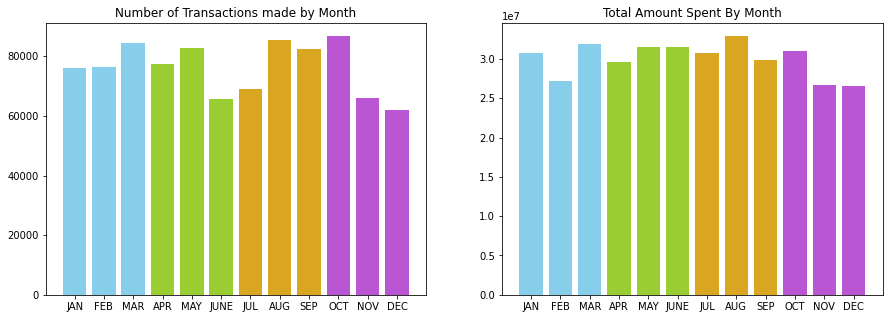

In [14]:
df["TRANS_DT"] = df["TRANS_DT"].astype("datetime64") #Converting TRANS_DT column into date format

bar_colors = ["skyblue","skyblue","skyblue", "yellowgreen", "yellowgreen", "yellowgreen" ,"goldenrod","goldenrod","goldenrod", "mediumorchid", "mediumorchid","mediumorchid"]
#Filtering out transactions made in 2015 and 2021 since neither of those are complete years in the dataset
byMonth = df[(df['TRANS_DT'].dt.year != 2015)]
byMonth = byMonth[(byMonth['TRANS_DT'].dt.year != 2021)]

months = ["JAN", "FEB", "MAR", "APR","MAY","JUNE","JUL","AUG","SEP","OCT","NOV","DEC"]

fig1, (count_bar, cost_bar) = plt.subplots(1,2, figsize = (15,5))
#Number of Transactions made bar chart
count_bar.bar(height = byMonth.groupby(byMonth["TRANS_DT"].dt.month).count()["TRANS_DT"],
        x = months, color = bar_colors)
count_bar.title.set_text("Number of Transactions made by Month")

#Amount Spent bar chart
cost_bar.bar(height=byMonth.groupby(byMonth["TRANS_DT"].dt.month).sum()["MERCHANDISE_AMT"], 
        x = months, color = bar_colors)
cost_bar.title.set_text("Total Amount Spent By Month")

plt.show()


The two bar graphs above breakdown both the total amount of transactions and total amount spent by month. The majority of the data seems to be insignificant with maybe only the lack of transactions made in June, July, November, and December being the only exceptions. Before these graphs were created transactions from both 2015 and 2021 were removed due to them being incomplete datasets and the possibility of them artificially skewing the data. Next the data will be broken down by percentages to further explore the the monthly purchase totals.

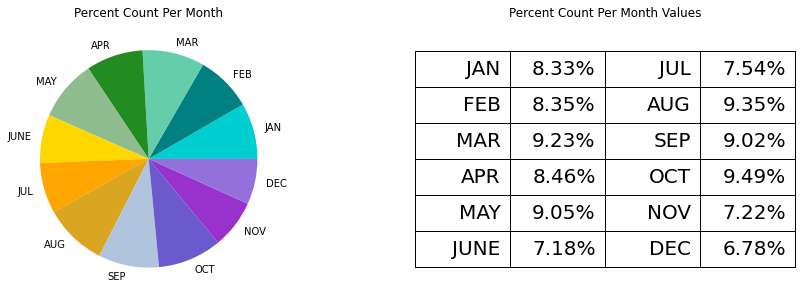

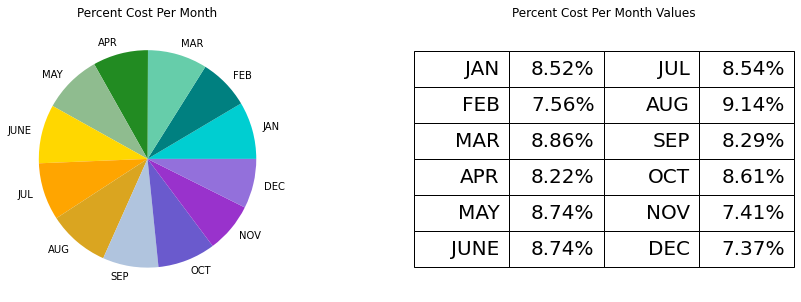

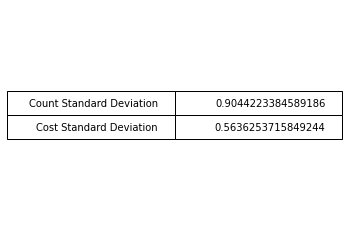

In [28]:
#Percentage Count Breakdown
pct_count = []
total = byMonth["MERCHANDISE_AMT"].count()
for elt in byMonth.groupby(byMonth["TRANS_DT"].dt.month).count()["MERCHANDISE_AMT"].values:
    pct_count.append(elt/total*100) 

graph_colors = ["darkturquoise","teal","mediumaquamarine",  "forestgreen", "darkseagreen", "gold","orange","goldenrod", "lightsteelblue", "slateblue", "darkorchid","mediumpurple"]
fig, (count_pie, count_table) = plt.subplots(1,2, figsize = (15,5))

#Pie Chart
count_pie.pie(pct_count, labels = months, colors = graph_colors)
count_pie.title.set_text("Percent Count Per Month")

#Table
count_data = []
for i in range(int((len(pct_count))/2)):
    count_data.append([months[i], str(round(pct_count[i],2))+"%", months[i+6], str(round(pct_count[i+6],2))+"%"])
count_table.axis("off")
count_table.title.set_text("Percent Count Per Month Values")
count_tab = count_table.table(count_data, loc = "center")
count_tab.set_fontsize(20)
count_tab.scale(1,3)
plt.show()


#Percentage Cost Breakdown
pct_cost = []
total = byMonth["MERCHANDISE_AMT"].sum()
for elt in byMonth.groupby(byMonth["TRANS_DT"].dt.month).sum()["MERCHANDISE_AMT"].values:
    pct_cost.append(elt/total*100) 

fig, (cost_pie, cost_table) = plt.subplots(1,2, figsize = (15,5))

#Pie Chart
cost_pie.pie(pct_cost, labels = months, colors = graph_colors)
cost_pie.title.set_text("Percent Cost Per Month")

#Table
cost_data = []
for i in range(int((len(pct_cost))/2)):
    cost_data.append([months[i], str(round(pct_cost[i],2))+"%", months[i+6], str(round(pct_cost[i+6],2))+"%"])
cost_table.axis("off")
cost_table.title.set_text("Percent Cost Per Month Values")
cost_tab = cost_table.table(cost_data, loc = "center")
cost_tab.set_fontsize(20)
cost_tab.scale(1,3)
plt.show()

std_data = [["Count Standard Deviation", np.std(pct_count)],["Cost Standard Deviation", np.std(pct_cost)]]
std_table = plt.table(std_data, loc = "center")
plt.axis("off")
std_table.set_fontsize(20)
std_table.scale(1,2)
plt.show()

The pie charts and tables of this section intend to breakdown the monthly data numbers by percentages instead of totals. When broken down by percentage we can see that the data still seems to be pretty evenly distributed in both test cases and having a standard deviation of between .5 to .9 percent. Using the visualizations and standard deviations of each of the two distributions we can see that there is not much variation within each distribution. The final step to ensure there is no significant variation will be to use ANOVA tests to test the computer outputs against the expected even distribution of the 100% total over the 12 months.

In [8]:
#ANOVA TESTING
expected = [100/12]*12
count_result = stats.f_oneway(pct_count, expected)
cost_result = stats.f_oneway(pct_cost, expected)
print(f"Total Count P-Value: {count_result[1]}")
print(f"Total Cost P-Value: {cost_result[1]}")

Total Count P-Value: 1.0
Total Cost P-Value: 1.0


With both the Count and Cost P-Values equaling 1 we must fail to reject the null hypothesis. This means that there is no significant difference between both the total cost of purchases made and the total amount of purchases made when compared to an evenly distributed distribution. This testing along with the visualizations above lead me to my conclusion that there is are no significant seasonal fluctuations in P-Card spending.

### Yearly Analysis

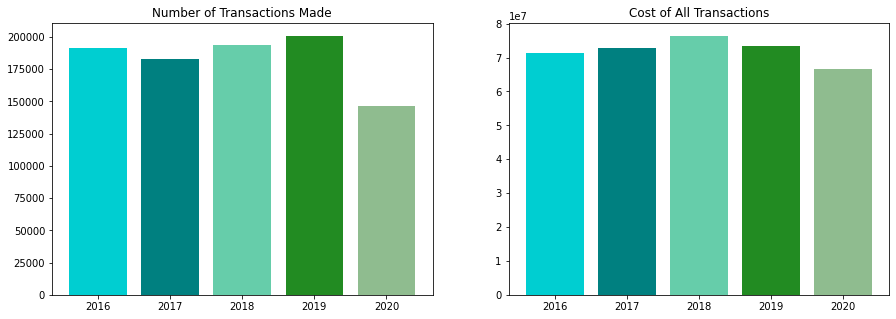

In [29]:

#Removing Incomplete Years
byYear = df[(df['TRANS_DT'].dt.year != 2015)]
byYear = byYear[(byYear['TRANS_DT'].dt.year != 2021)]

years = ["2016", "2017", "2018", "2019", "2020"]

fig1, (count_bar, cost_bar) = plt.subplots(1,2, figsize = (15,5))

count_bar.bar(height = byYear.groupby(byYear["TRANS_DT"].dt.year)["TRANS_DT"].count(), x = years, color = graph_colors[:5])
count_bar.title.set_text("Number of Transactions Made")

cost_bar.bar(height = byYear.groupby(byYear["TRANS_DT"].dt.year)["MERCHANDISE_AMT"].sum(), x = years, color = graph_colors[:5])
cost_bar.title.set_text("Cost of All Transactions")
plt.show()

From looking at the graphs above one thing that becomes apparent is a significant drop off in number of transaction made in 2020 when compared to 2019. The first and probably most obvious hypothesis into the cause of this would be the onset of the COVID-19 pandemic. I plan on further investigating this by narrowing the scope of the graphs above specifically around that time period as well as calculating the percentage of changes throughout the years.

2019 to 2020 change -27.028534991232267


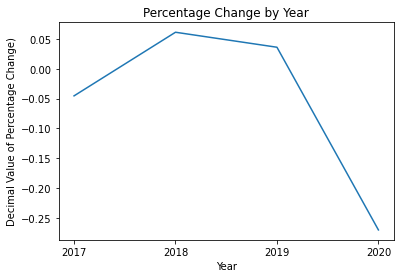

In [35]:
yearGroup = byYear.groupby(byYear["TRANS_DT"].dt.year)["MERCHANDISE_AMT"].count()
change19_20 = (yearGroup[2020] - yearGroup[2019])/yearGroup[2019] * 100
print(f"2019 to 2020 change {change19_20}")
int_years = [2016,2017,2018,2019, 2020]

plt.plot(yearGroup.pct_change().dropna())
plt.title("Percentage Change by Year")
plt.ylabel("Decimal Value of Percentage Change)")
plt.xlabel("Year")
plt.xticks(int_years[1:])
plt.show()

As the above calculation and graph demonstrate there was a significant decrease of 27% from 2019 to 2020. This further supports the hypothesis that COVID-19 significantly affected Government P-Card Spending. The next and final step of the time based analysis will be to check and see if there was a significant decrease right at the onset of the pandemic.

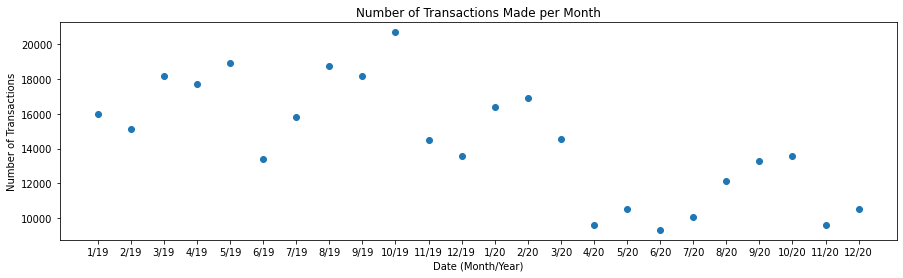

In [11]:
mask = (df["TRANS_DT"].dt.year >= 2019) & (df["TRANS_DT"].dt.year <= 2020)
year_19_20 = df.loc[mask]

month_year = []
for i in range(12):
    i = i + 1
    month_year.append(str(i)+ "/19")
for i in range(12):
    i = i + 1
    month_year.append(str(i)+"/20")
    
f = plt.figure()
f.set_figwidth(15)

byMonthYear = year_19_20.groupby([year_19_20["TRANS_DT"].dt.year, year_19_20["TRANS_DT"].dt.month])
plt.title("Number of Transactions Made per Month")
plt.xlabel("Date (Month/Year)")
plt.ylabel("Number of Transactions")
plt.scatter(month_year,byMonthYear["TRANS_DT"].count().values)
plt.show()

This final scatter plot shows the stark drop off that occurred in number of transactions made right around April of 2020. This of course lines up with the onset of COVID-19 Restrictions in Delaware. With these above pieces of evidence I believe it is a safe assumption to claim that COVID-19 caused a significant decrease in government P-Card spending. This claim is also supported by the fact that one of the main uses for P-Cards is traveling expenses which obviously would have been drastically reduced with people isolating at home.

## Purchase Category Breakdown

The next section of analysis aims to answer the second research question of __What categories do P-Card purchases fall under? What are the general trends of purchases and did COVID-19 have an impact on what was purchased?__ Since the previous analysis established that COVID-19 did affect purchases habits in 2020, I aim to first establish the general trends from all years and then specifically isolate the year 2020 to see how those purchase categories differ. 

### Distribution Analysis

In [36]:
#Used to count the number of instances of each purchase category
unique_list = df["CAT_DESCR"].unique()
item_count = pd.Series(dtype="int64",index = unique_list)
for cat in unique_list:
    item_count[cat] = df["CAT_DESCR"].str.count(cat).sum()
item_count.head()

INTERNAL TRANSACTION                               687
EATING PLACES RESTAURANTS                        10970
LODGING                                           7301
MISCELLANEOUS AND SPECIALTY RETAIL STORES         2275
COMMERCIAL EQUIPMENT NOT ELSEWHERE CLASSIFIED     2506
dtype: int64

In [37]:
#Reading in csv to Series
item_count = pd.read_csv("item_count.csv", index_col = 0, header = None, squeeze=True)
item_count.head()

0
NaN                                              0
INTERNAL TRANSACTION                           687
EATING PLACES RESTAURANTS                    10970
LODGING                                       7301
MISCELLANEOUS AND SPECIALTY RETAIL STORES     2275
Name: 1, dtype: int64

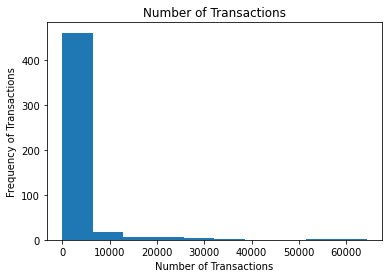

In [94]:
sorted_s = item_count.sort_values(ascending=False)
index_list = list(range(1,len(sorted_s)+1))
plt.hist(sorted_s.values)
plt.title("Number of Transactions")
plt.ylabel("Frequency of Transactions")
plt.xlabel("Number of Transactions")
plt.show()

From the above histogram we can tell that the vast majority of purchase categories have between 0 and 5,000 purchases made in them. More interestingly however are the outliers that have between 50,000 and 60,000 purchases made. From looking at the sorted list below we can find that these categories are Stationery-Office Supplies, Book Stores, and Eating Places Restaurants. Although these categories have a significant larger portion of purchases made it is not surprising since the main purposes of P-Cards are office supplies as well as travel which would entail restaurant charges. As for Book Stores, upon further investigation into the data set, Amazon.com is classified under "Book Store"

In [42]:
sorted_s.head()

0
Stationery-Office Supplies-Printing Writing Pap    64325
Book Stores                                        56676
Eating Places Restaurants                          52983
Industrial Supplies Not Elsewhere Classified       34677
Lodging                                            30266
Name: 1, dtype: int64

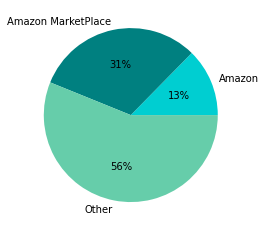

In [87]:
amazon = len(df.loc[df["MERCHANT"] == "AMAZON.COM"])
amazon_market = len(df.loc[df['MERCHANT'] == "AMAZON MKTPLACE PMTS"])
other = sorted_s["Book Stores"] - amazon - amazon_market
plt.pie([amazon, amazon_market, other], labels = ["Amazon","Amazon MarketPlace", "Other"], autopct="%1.0f%%", colors = graph_colors[:3])
plt.show()

From the above pie chart we kind see that Amazon and Amazon MarketPlace account for approximately 44% of all purchases in the Book Store category, making it the most significant contributor to the category.

### Top Contributor Breakdown

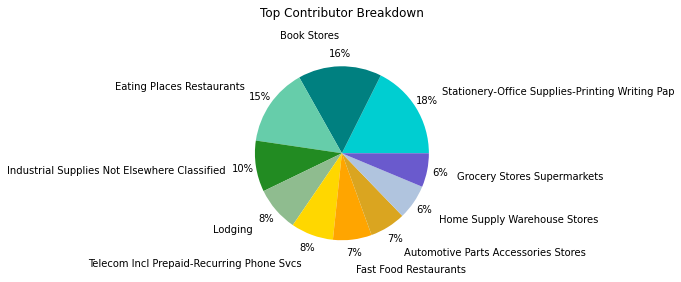

In [82]:
top10 = sorted_s.head(10)

f = plt.figure()
f.set_figwidth(30)
plt.pie(top10.values, labels = top10.index, autopct="%1.0f%%", pctdistance = 1.15, labeldistance = 1.35, colors = graph_colors)
plt.title("Top Contributor Breakdown", y = 1.1)
plt.show()

By Looking at the top 10 purchase categories we first see that there are three major categories, Eating Places, Office Supplies, and Book Stores. However it is important to note once again that in the original data set Amazon.com is classified as a Book Store which I believe accounts for why Book Stores is such a large proportion. Another very interesting factor to consider is that 5 out of the 10 top purchases are commonly associated with travel, those being Eating Places, Lodging, Prepaid Phone Svcs, Fast Food, and Automotive Parts. This leads me to suspect that when just 2020 data is analyzed, these categories might fall off significantly. 

### Affects of COVID-19 on Purchase Breakdown

In [88]:
#Isolating 2020 data
df20 = df[df["TRANS_DT"].dt.year == 2020]
unique_list20 = df20["CAT_DESCR"].unique()
item_count20 = pd.Series(dtype="int64",index = unique_list20)
for cat in unique_list20:
    item_count20[cat] = df20["CAT_DESCR"].str.count(cat).sum()
item_count20.head()

Travel                                                 1179
Advertising Services                                   1431
Book Stores                                           15001
Stationery-Office Supplies-Printing Writing Pap       10753
Direct Marketing-Continuity-Subscription Merchants     2060
dtype: int64

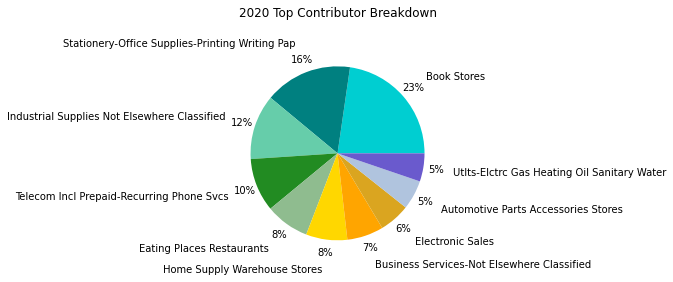

In [89]:
sorted_s20 = item_count20.sort_values(ascending=False)
top10_20 = sorted_s20.head(10)
plt.pie(top10_20,labels=top10_20.index, autopct="%1.0f%%" ,pctdistance = 1.15, labeldistance = 1.35, colors = graph_colors)
plt.title("2020 Top Contributor Breakdown", y = 1.1)
plt.show()

Comparing the two above pie charts demonstrates how COVID-19 affected P-Card purchase categories. The most notable difference is that Lodging as been completely removed from the pie chart. Before the onset of the pandemic Lodging account for 8% of the 10 most popular spending categories so its absence from the 2020 data set is very significant. A second noticeable difference is that Fast Food Restaurants also did not make the top 10 spending categories of 2020. The last difference to point out is that restaurants also fell significantly from the all years data set, dropping 7% from 15% to 8%. The other categories mentioned above as possible points of interest appear to have had little to no change.

## By Department Insights

The final section of my analysis will center on what departments are contributing the most to P-Card Spending. The main objective of this section is to answer the final research question __How much money is typically spent per purchase? Do different departments have different means or is it consistent throughout? Did COVID-19 also affect which department are making the most purchases?__ I will start by finding which departments spend the most money using the P-Card system and then compare those departments to each other looking for any significant outliers.

### Department Spending by Sum

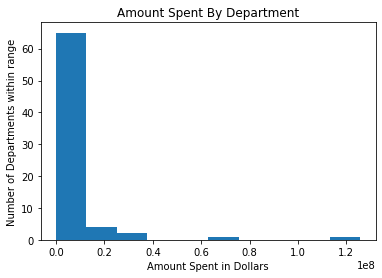

DEPT_NAME
DEPT OF CORRECTIONS               1.258615e+08
DEPT OF TRANSPORTATION            6.917928e+07
DEL TECH AND COMM COLLEGE         2.845252e+07
DEPT OF TECHNOLOGY AND INFOR      2.609267e+07
DEPT OF NATRL RES AND ENV CONT    2.442180e+07
Name: MERCHANDISE_AMT, dtype: float64

In [95]:
byDeptSum = df.groupby(df["DEPT_NAME"])["MERCHANDISE_AMT"].sum().sort_values(ascending = False)

plt.hist(byDeptSum.values)
plt.title("Amount Spent By Department")
plt.ylabel("Number of Departments within range")
plt.xlabel("Amount Spent in Dollars")
plt.show()

byDeptSum.head()

The histogram above shows the distribution of how much money is spent by each department. From it, we see that the majority of departments have spent between 0 and 10 million dollars in the years this data was collected. However this data also has two notable outliers that have spent around 60 million and 120 million dollars in the same time span. These departments are The Department of Corrections and the Department of Transportation. However, it is also possible that these departments are significantly bigger in personnel size inherently increasing the amount of spending their department accumulates. My next steps will be to compare the mean spending of these two groups against the mean of other departments and the overall group to see if these groups are also outliers in terms of amount spent per purchase.

### Mean Analysis

In [22]:
byDeptMean = df.groupby(df["DEPT_NAME"])["MERCHANDISE_AMT"].mean().sort_values(ascending = False)
byDeptMean.head()

DEPT_NAME
DEPT OF TECHNOLOGY AND INFOR     2588.558486
DEPT OF CORRECTIONS              1172.331701
EXECUTIVE                         629.868419
ACADEMY OF DOVER CHARTER SCHL     559.403043
DEPT OF TRANSPORTATION            494.625242
Name: MERCHANDISE_AMT, dtype: float64

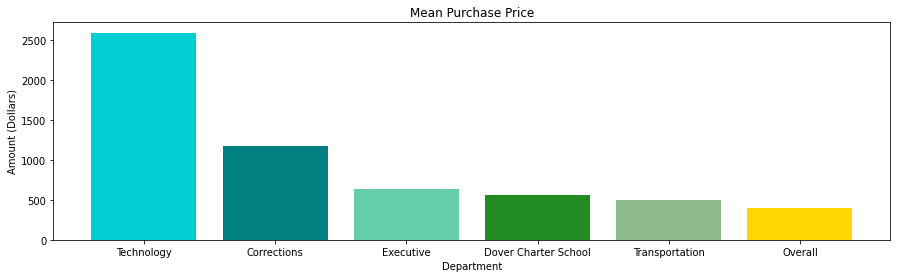

In [131]:
corrections = df[df.DEPT_NAME == "DEPT OF CORRECTIONS"]["MERCHANDISE_AMT"].mean()
transport = df[df.DEPT_NAME == "DEPT OF TRANSPORTATION"]["MERCHANDISE_AMT"].mean()
exe = df[df.DEPT_NAME == "EXECUTIVE"]["MERCHANDISE_AMT"].mean()
dover_charter = df[df.DEPT_NAME == "ACADEMY OF DOVER CHARTER SCHL"]["MERCHANDISE_AMT"].mean()
tech = df[df.DEPT_NAME == "DEPT OF TECHNOLOGY AND INFOR"]["MERCHANDISE_AMT"].mean()
overall = df.MERCHANDISE_AMT.mean()

c_data = df[df.DEPT_NAME == "DEPT OF CORRECTIONS"]["MERCHANDISE_AMT"]
t_data = df[df.DEPT_NAME == "DEPT OF TRANSPORTATION"]["MERCHANDISE_AMT"]
e_data = df[df.DEPT_NAME == "EXECUTIVE"]["MERCHANDISE_AMT"].values
d_data = df[df.DEPT_NAME == "ACADEMY OF DOVER CHARTER SCHL"]["MERCHANDISE_AMT"].values
tech_data = df[df.DEPT_NAME == "DEPT OF TECHNOLOGY AND INFOR"]["MERCHANDISE_AMT"].values
overall_data = df.MERCHANDISE_AMT
means = [tech, corrections, exe, dover_charter, transport, overall]
graph_labels = ["Technology", "Corrections", "Executive", "Dover Charter School", "Transportation", "Overall"]

swarm_data = [c_data, t_data, e_data, d_data, tech_data]
f = plt.figure()
f.set_figwidth(15)
plt.bar(height = means, x = graph_labels, color = graph_colors[:6])
plt.title("Mean Purchase Price")
plt.ylabel("Amount (Dollars)")
plt.xlabel("Department")
plt.show()

After separating the data by mean of purchase amount, we see that both the Department of Corrections and the Department of Transportation are also in the top 5 for this category as well. Another interesting discovery is that while the Department of Technology is not as significant as an outlier in amount spent, it is significantly larger in price per purchase. Since the difference is so large I suspect there might be large outliers within the Technology Department purchases and my next step will be to identify them to compare against the outliers in the other interesting categories of Corrections and Transportation as well as the overall data set.

### Outlier Analysis

The Outlier Analysis section serves as a follow up to the mean purchase price section above. Here I intend to look at the contribution of outliers to the means calculated, particularly in the case of the Technology Department since its mean purchase price is so much higher than the others comparatively.

In [46]:
tech_count = df[df.DEPT_NAME == "DEPT OF TECHNOLOGY AND INFOR"]["MERCHANDISE_AMT"].count()
corrections_count = df[df.DEPT_NAME == "DEPT OF CORRECTIONS"]["MERCHANDISE_AMT"].count()
transport_count = df[df.DEPT_NAME == "DEPT OF TRANSPORTATION"]["MERCHANDISE_AMT"].count()
print(f"""
Department of Transportation: {tech_count}
Department of Corrections: {corrections_count}
Department of Transport: {transport_count}
      """)


Department of Transportation: 10080
Department of Corrections: 107360
Department of Transport: 139862
      


In [54]:
def detect_outliers(series):
    series = series[series.between(0, series.max())]

    #Outlier Calculations
    Q1 = np.percentile(series, 25, interpolation = 'midpoint')
    Q3 = np.percentile(series, 75, interpolation = 'midpoint')
    IQR = Q3-Q1
    upper = series >= (Q3+1.5*IQR)
    lower = series <= (Q1-1.5*IQR)

    outlier_sum = upper.sum() + lower.sum()
    print(f"""
    Total Number of Purchases {len(series)}
    Amount of Upper Outliers {upper.sum()}
    Amount of Lower Outliers {lower.sum()}
    Total Number of Outliers {outlier_sum}
    Percentage of Outliers = {round(outlier_sum/len(series) * 100, 2)}%
    """)
    drop_outliers = series[series.between(Q1-1.5*IQR, Q3+1.5*IQR)]
    return drop_outliers

In [57]:
def outlier_hist(series):
    plt.hist(series, color = "skyblue")
    plt.title("Amount of Purchases by Price Point")
    plt.ylabel("Frequency")
    plt.xlabel("Price")
    plt.show()

__Department of Technology Outliers__


    Total Number of Purchases 9942
    Amount of Upper Outliers 1404
    Amount of Lower Outliers 0
    Total Number of Outliers 1404
    Percentage of Outliers = 14.12%
    


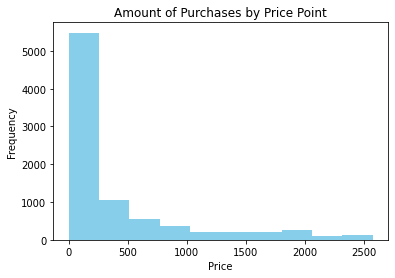

In [58]:
tech_purchases = df[df.DEPT_NAME == "DEPT OF TECHNOLOGY AND INFOR"]["MERCHANDISE_AMT"]
tech_purchases = detect_outliers(tech_purchases)
outlier_hist(tech_purchases)

__Department of Corrections Outliers__


    Total Number of Purchases 105619
    Amount of Upper Outliers 14418
    Amount of Lower Outliers 0
    Total Number of Outliers 14418
    Percentage of Outliers = 13.65%
    


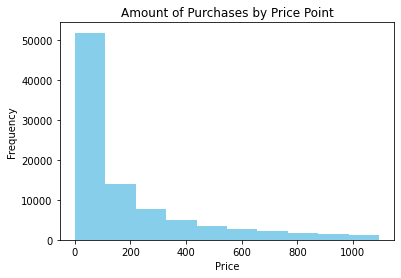

In [59]:
corr_purchases = df[df.DEPT_NAME == "DEPT OF CORRECTIONS"]["MERCHANDISE_AMT"]
corr_purchases = detect_outliers(corr_purchases)
outlier_hist(corr_purchases)

__Department of Transportation__


    Total Number of Purchases 138688
    Amount of Upper Outliers 17618
    Amount of Lower Outliers 0
    Total Number of Outliers 17618
    Percentage of Outliers = 12.7%
    


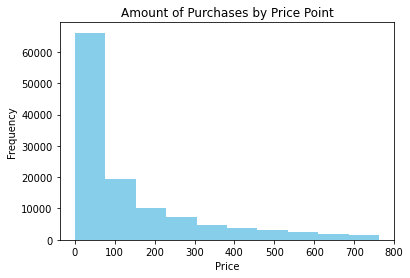

In [60]:
transport_purchases = df[df.DEPT_NAME == "DEPT OF TRANSPORTATION"]["MERCHANDISE_AMT"]
transport_purchases = detect_outliers(transport_purchases)
outlier_hist(transport_purchases)

__Total Dataset__


    Total Number of Purchases 1018345
    Amount of Upper Outliers 122621
    Amount of Lower Outliers 0
    Total Number of Outliers 122621
    Percentage of Outliers = 12.04%
    


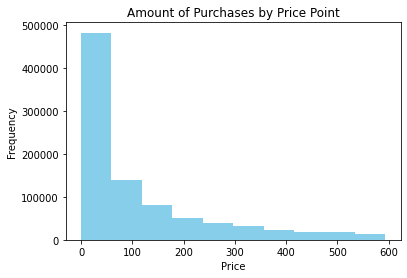

In [61]:
total_purchases = df["MERCHANDISE_AMT"]
total_purchases = detect_outliers(total_purchases)
outlier_hist(total_purchases)

Both the outlier data and the histogram of purchase frequencies for all four groups selected are extremely similar to each other. Because of all 3 major departments similarity to each other and the entire population as a whole we can determine that none of those groups have spending trends that are significantly different. As for the large difference in the mean of the Department of Transportation, I believe that can be attributed to a larger percentage of outliers in its data set as well as having a smaller total amount of purchases. Those two factors when combined can significantly alter a mean. 

### Affects of COVID-19 on By Department Spending

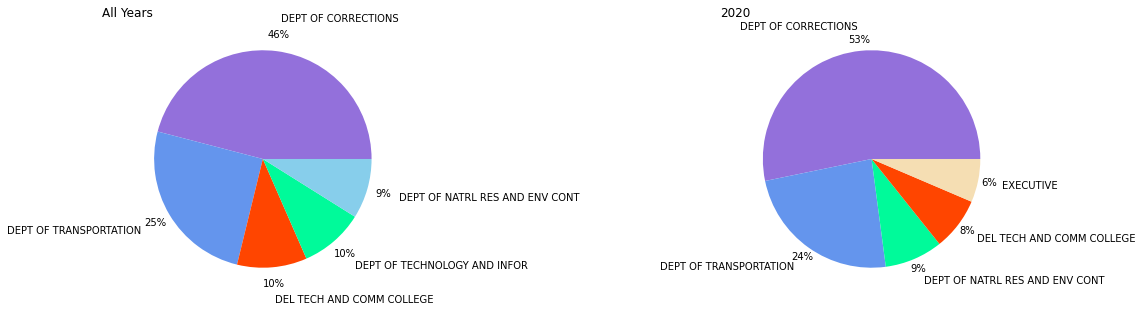

In [71]:
byDeptSum = df.groupby(df["DEPT_NAME"])["MERCHANDISE_AMT"].sum().sort_values(ascending = False)
top5Dept = byDeptSum.head()

df20 = df[df["TRANS_DT"].dt.year == 2020]
byDeptSum20 = df20.groupby(df20["DEPT_NAME"])["MERCHANDISE_AMT"].sum().sort_values(ascending = False)
top5Dept20 = byDeptSum20.head()

colors_all = ["mediumpurple", "cornflowerblue",  "orangered", "mediumspringgreen", "skyblue"]
colors20 = ["mediumpurple", "cornflowerblue", "mediumspringgreen", "orangered", "wheat"]

fig, (all_pie, pie20) = plt.subplots(1,2, figsize = (20,5))
top5Dept = byDeptSum.head()

all_pie.pie(top5Dept.values, labels = top5Dept.index, autopct="%1.0f%%", pctdistance = 1.15, labeldistance = 1.3, colors = colors_all)
all_pie.title.set_text("All Years")
all_pie.title.set_x(0)
pie20.pie(top5Dept20.values, labels = top5Dept20.index, autopct="%1.0f%%", pctdistance = 1.1, labeldistance = 1.22, colors = colors20)
pie20.title.set_text("2020")
pie20.title.set_x(0)
plt.show()

The departments making the most purchases in total versus 2020 seems to be mostly unchanged. The only notable changes are the Department of Natural Resources being replaced by the Executive Department in 2020. The percentages of each department also remain consistent throughout both charts. This leads to the conclusion that although COVID-19 affected the amount being purchased on P-Cards as well as what supplies were being bought, the top departmental contributors remains mostly unchanged.

## Conclusion and Discussion

All the above analysis was created with the intent to paint a clear picture of how P-Card money allocation is being spent for the tax payers supporting the P-Card program. In my following conclusion I will break apart my analysis by research question, providing a brief overview of my finding for each.

### Are there seasonal and yearly fluctuations or trends in P-Card spending? 
The first area of analysis focused on both the yearly and seasonal fluctuations in P-Card spending. In this section I found that the monthly spending on P-Cards remains fairly constant across all 12 months. More interestingly however my analysis captured a stark drop in P-Card spending from 2019 to 2020. After further investigation into this matter I found drop happened specifically in March/April of 2020 giving me reason to suspect the drop in P-Card purchasing was caused by the onset of the COVID-19 Pandemic. This is an hypothesis that was further supported by the next sector of analysis where I broke down what categories P-Card spending was mostly used.

### What categories do P-Card purchases fall under? What are the general trends of purchases and did COVID-19 have an impact on what was purchased?  
In the dataset as a whole, categories such as lodging, restaurants, and fast food were some of the most popular areas of spending, but in the 2020 dataset these categories were not as popular. I believe the restrictions put on traveling and the closing of restaurants because of COVID-19 explain the sudden lack of these spending categories in the dataset. As for the categories of spending as a whole, I found that the categories followed a lognormal regression meaning that while there were some categories that a lot of purchases were made in the majority of purchase categories fell under 10,000 instances over the 6 year period.

### How much money is typically spent per purchase? Do different departments have different means or trends? Is it consistent throughout?  Did COVID-19 also affect which department are making the most purchases?
Finally the last are of analysis focused on determining which Departments were making the most P-Card purchases. Within this area I found the two largest outliers by total purchases to be the Department of Corrections as well as the Department of Transportation. After looking at the data by total sum, I sorted the data by mean purchase price where a 3rd outlier in the Department of Technology had a mean purchase price of more than double the next highest department. I felt that this justified a closer inspection into the Department of Technology's purchases as well as the first two suspected outliers. My analysis lead me to calculate the outliers of all these departments where I discovered the Department of Technology had the largest proportion of outliers as well as the least instances of purchases out of the group, explaining why the department's mean purchase prices was so large. After plotting the histograms off all these groups they all followed the same distribution with the majority of purchases falling under the the 250 dollar range. The last area of the by department analysis aimed to see if what departments were spending the most money was also affected by COVID-19. After plotting the percentages of top spenders I found that there was no significant change in top spenders from 2020 when compared against the rest of the dataset.

### Social Implications of Results
The entirety of my report was made with the intent providing a non-bias general overview of P-Card and more generally government spending for the public. While I did my best to negate any biases within the analysis there are certainly aspects of the results that can be interpreted in multiple ways. One result that comes to mind is the Department of Corrections spending, this departments spending makes up for a significant portion of the top spender data. There are many different opinions and views on the American Prison system and this data could be interpolated in many ways for discussion on this topic in particular.

## Resources Used

[University of Delaware P-Card Audit](https://www.delawarepublic.org/post/ud-odds-auditors-office-over-procurement-card-audit)  
[Delaware P-Card Spending Manual](https://budget.delaware.gov/accounting-manual/documents/chapter12.pdf?ver=0917)  
[NAPCP P-Card Summary](https://www.napcp.org/page/PCardProcess)